BHARAT INTERN INTERNSHIP

TASK 1: STOCK PREDICTION(MSFT.csv)

STEPS INVOLVED :
1. IMPORTING LIBRARIES AND DATA TO BE USED
2. GATHERING INSIGHTS
3. DATA PRE-PROCESSING
4. CREATING LSTM MODEL
5. VISUALIZING ACTUAL VS PREDICTED DATA
6. PREDICTING UPCOMING 15 DAYS

STEP 1 : IMPORTING LIBRARIES

In [1]:
#importing libraries to be used
import numpy as np # for linear algebra
import pandas as pd # data preprocessing
import matplotlib.pyplot as plt # data visualization library
import seaborn as sns # data visualization library
%matplotlib inline
import warnings
warnings.filterwarnings('ignore') # ignore warnings 

from sklearn.preprocessing import MinMaxScaler # for normalization
from keras.models import Sequential
from keras.layers import Dense, Dropout, LSTM, Bidirectional

IMPORTING DATA TO BE USED

In [3]:

df = pd.read_csv('MSFT.csv') # data_importing

df.head() # fetching first 10 rows of dataset

,Date,Open,High,Low,Close,Adj Close,Volume
0,1986-03-13,0.088542,0.101563,0.088542,0.097222,0.061434,1031788800
1,1986-03-14,0.097222,0.102431,0.097222,0.100694,0.063628,308160000
2,1986-03-17,0.100694,0.103299,0.100694,0.102431,0.064725,133171200
3,1986-03-18,0.102431,0.103299,0.098958,0.099826,0.063079,67766400
4,1986-03-19,0.099826,0.100694,0.097222,0.098090,0.061982,47894400


In [4]:
df = pd.read_csv('MSFT.csv') # data_importing
df.head(10) # fetching first 10 rows of dataset

,Date,Open,High,Low,Close,Adj Close,Volume
0,1986-03-13,0.088542,0.101563,0.088542,0.097222,0.061434,1031788800
1,1986-03-14,0.097222,0.102431,0.097222,0.100694,0.063628,308160000
2,1986-03-17,0.100694,0.103299,0.100694,0.102431,0.064725,133171200
3,1986-03-18,0.102431,0.103299,0.098958,0.099826,0.063079,67766400
4,1986-03-19,0.099826,0.100694,0.097222,0.098090,0.061982,47894400
5,1986-03-20,0.098090,0.098090,0.094618,0.095486,0.060337,58435200
6,1986-03-21,0.095486,0.097222,0.091146,0.092882,0.058692,59990400
7,1986-03-24,0.092882,0.092882,0.089410,0.090278,0.057046,65289600
8,1986-03-25,0.090278,0.092014,0.089410,0.092014,0.058143,32083200
9,1986-03-26,0.092014,0.095486,0.091146,0.094618,0.059788,22752000


In [5]:
df.tail(30)

,Date,Open,High,Low,Close,Adj Close,Volume
9053,2022-02-10,304.040009,309.119995,300.700012,302.380005,301.756073,45386200
9054,2022-02-11,303.190002,304.290009,294.220001,295.040009,294.431213,39175600
9055,2022-02-14,293.769989,296.760010,291.350006,295.000000,294.391296,36359500
9056,2022-02-15,300.010010,300.799988,297.019989,300.470001,299.850006,27058300
9057,2022-02-16,298.369995,300.869995,293.679993,299.500000,299.500000,29982100
9058,2022-02-17,296.359985,296.799988,290.000000,290.730011,290.730011,32461600
9059,2022-02-18,293.049988,293.859985,286.309998,287.929993,287.929993,34264000
9060,2022-02-22,285.000000,291.540009,284.500000,287.720001,287.720001,41736100
9061,2022-02-23,290.179993,291.700012,280.100006,280.269989,280.269989,37811200
9062,2022-02-24,272.510010,295.160004,271.519989,294.589996,294.589996,56989700


STEP 2 : GATHERING INSIGHTS

In [6]:
df.shape

(9083, 7)

In [7]:
# statistical description of data
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,9083.000000,9083.000000,9083.000000,9083.000000,9083.000000,9.083000e+03
mean,41.324936,41.760887,40.878488,41.335628,36.256120,5.875055e+07
std,59.696905,60.272218,59.081728,59.714567,59.981436,3.845200e+07
min,0.088542,0.092014,0.088542,0.090278,0.057046,2.304000e+06
25%,4.050781,4.102051,4.027344,4.075195,2.575089,3.461230e+07
50%,26.820000,27.100000,26.520000,26.840000,18.948530,5.203200e+07
75%,40.034999,40.443751,39.500000,39.937500,29.244812,7.265400e+07
max,344.619995,349.670013,342.200012,343.109985,342.402008,1.031789e+09


In [8]:
# summary of data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9083 entries, 0 to 9082
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       9083 non-null   object 
 1   Open       9083 non-null   float64
 2   High       9083 non-null   float64
 3   Low        9083 non-null   float64
 4   Close      9083 non-null   float64
 5   Adj Close  9083 non-null   float64
 6   Volume     9083 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 496.9+ KB


STEP 3 : DATA PRE-PROCESSING

In [9]:
df = df[['Date','Open','Close']] # Extracting required columns
df['Date'] = pd.to_datetime(df['Date'].apply(lambda x: x.split()[0])) # converting object dtype of date column to datetime dtype
df.set_index('Date',drop=True,inplace=True) # Setting date column as index
df.head(30)

,Open,Close
Date,,
1986-03-13,0.088542,0.097222
1986-03-14,0.097222,0.100694
1986-03-17,0.100694,0.102431
1986-03-18,0.102431,0.099826
1986-03-19,0.099826,0.098090
1986-03-20,0.098090,0.095486
1986-03-21,0.095486,0.092882
1986-03-24,0.092882,0.090278
1986-03-25,0.090278,0.092014


In [10]:
#checking for the null values
df.isnull().sum()

Open     0
Close    0
dtype: int64

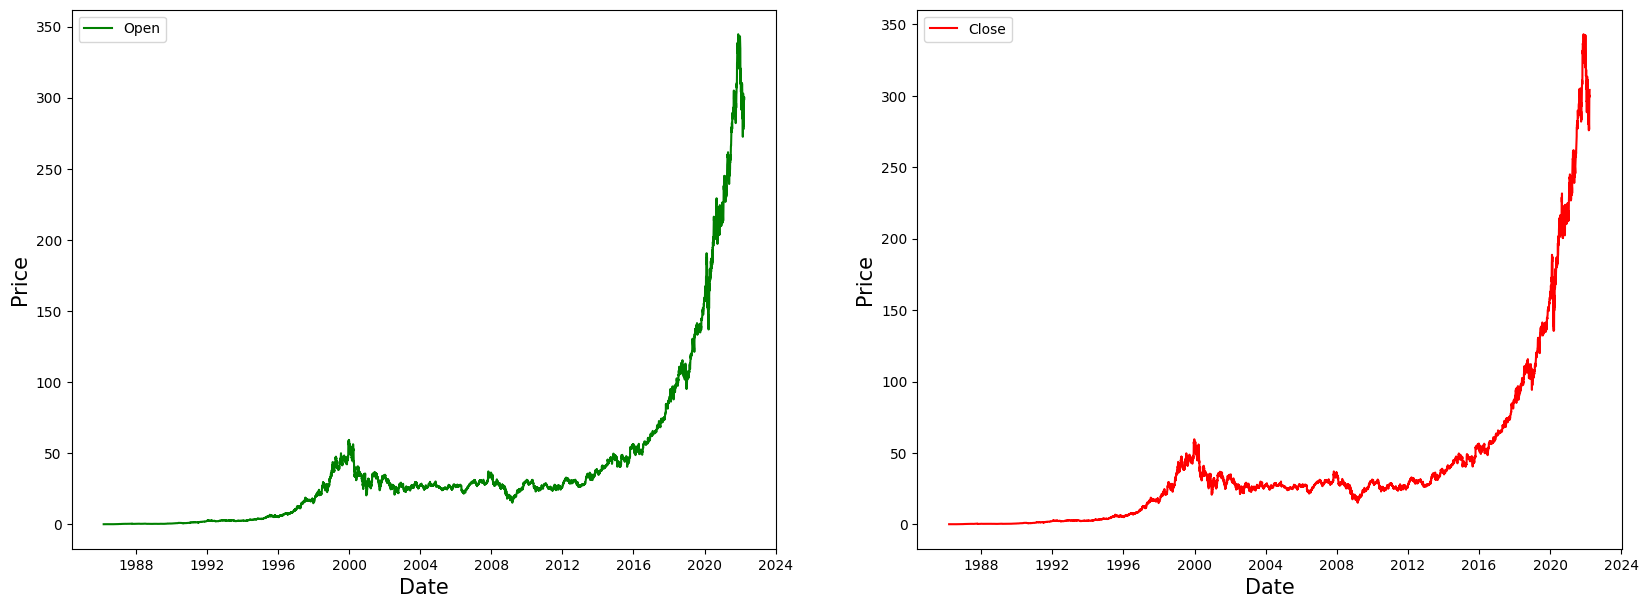

In [11]:
# plotting open and closing price on date index
fig, ax =plt.subplots(1,2,figsize=(20,7))
ax[0].plot(df['Open'],label='Open',color='green')
ax[0].set_xlabel('Date',size=15)
ax[0].set_ylabel('Price',size=15)
ax[0].legend()

ax[1].plot(df['Close'],label='Close',color='red')
ax[1].set_xlabel('Date',size=15)
ax[1].set_ylabel('Price',size=15)
ax[1].legend()

fig.show()

array([[<Axes: title={'center': 'Open'}>,
        <Axes: title={'center': 'Close'}>]], dtype=object)

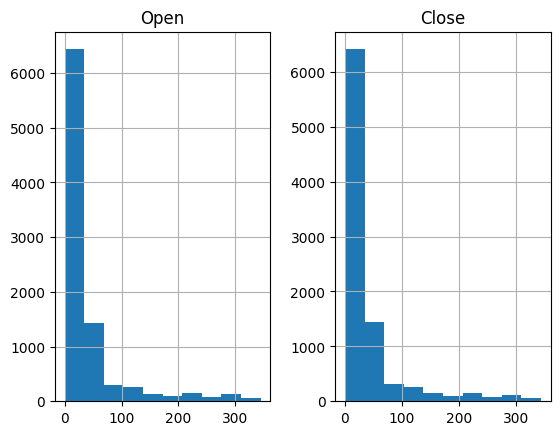

In [12]:
df.hist()

STEP 3 : DATA PRE-PROCESSING

In [13]:
MMS = MinMaxScaler()
df[df.columns] = MMS.fit_transform(df)

df.head(10)

,Open,Close
Date,,
1986-03-13,0.000000,0.000020
1986-03-14,0.000025,0.000030
1986-03-17,0.000035,0.000035
1986-03-18,0.000040,0.000028
1986-03-19,0.000033,0.000023
1986-03-20,0.000028,0.000015
1986-03-21,0.000020,0.000008
1986-03-24,0.000013,0.000000
1986-03-25,0.000005,0.000005


In [14]:
# splitting the data into training and test set
training_size = round(len(df) * 0.75) # Selecting 75 % for training and 25 % for testing
training_size

6812

In [15]:
train_data = df[:training_size]
test_data  = df[training_size:]

train_data.shape, test_data.shape

((6812, 2), (2271, 2))

In [16]:
# Function to create sequence of data for training and testing

def create_sequence(dataset):
  sequences = []
  labels = []

  start_idx = 0

  for stop_idx in range(50,len(dataset)): # Selecting 50 rows at a time
    sequences.append(dataset.iloc[start_idx:stop_idx])
    labels.append(dataset.iloc[stop_idx])
    start_idx += 1
  return (np.array(sequences),np.array(labels))

In [17]:
train_seq, train_label = create_sequence(train_data) 
test_seq, test_label = create_sequence(test_data)
train_seq.shape, train_label.shape, test_seq.shape, test_label.shape

((6762, 50, 2), (6762, 2), (2221, 50, 2), (2221, 2))

STEP 4 : CREATING LSTM MODEL

In [18]:
# imported Sequential from keras.models 
model = Sequential()
# importing Dense, Dropout, LSTM, Bidirectional from keras.layers 
model.add(LSTM(units=25, return_sequences=True, input_shape = (train_seq.shape[1], train_seq.shape[2])))

model.add(Dropout(0.1)) 
model.add(LSTM(units=25))

model.add(Dense(2))

model.compile(loss='mean_squared_error', optimizer='adam', metrics=['mean_absolute_error'])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 50, 25)            2800      
                                                                 
 dropout (Dropout)           (None, 50, 25)            0         
                                                                 
 lstm_1 (LSTM)               (None, 25)                5100      
                                                                 
 dense (Dense)               (None, 2)                 52        
                                                                 
Total params: 7952 (31.06 KB)
Trainable params: 7952 (31.06 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [19]:
# fitting the model by iterating the dataset over 100 times(100 epochs)
model.fit(train_seq, train_label, epochs=100,validation_data=(test_seq, test_label), verbose=1)

Epoch 1/100
212/212 [==============================] - 10s 32ms/step - loss: 5.2488e-05 - mean_absolute_error: 0.0040 - val_loss: 0.0058 - val_mean_absolute_error: 0.0401
Epoch 2/100
212/212 [==============================] - 6s 27ms/step - loss: 1.5305e-05 - mean_absolute_error: 0.0026 - val_loss: 0.0059 - val_mean_absolute_error: 0.0417
Epoch 3/100
212/212 [==============================] - 5s 26ms/step - loss: 1.2604e-05 - mean_absolute_error: 0.0023 - val_loss: 0.0041 - val_mean_absolute_error: 0.0336
Epoch 4/100
212/212 [==============================] - 6s 26ms/step - loss: 1.1989e-05 - mean_absolute_error: 0.0023 - val_loss: 0.0050 - val_mean_absolute_error: 0.0386
Epoch 5/100
212/212 [==============================] - 5s 25ms/step - loss: 1.0442e-05 - mean_absolute_error: 0.0021 - val_loss: 0.0037 - val_mean_absolute_error: 0.0339
Epoch 6/100
212/212 [==============================] - 6s 27ms/step - loss: 1.0300e-05 - mean_absolute_error: 0.0022 - val_loss: 0.0038 - val_mean_ab

In [20]:
# predicting the values after running the model
test_predicted = model.predict(test_seq)
test_predicted[:8]

70/70 [==============================] - 4s 16ms/step


array([[0.10017034, 0.10042715],
       [0.09987141, 0.10013019],
       [0.10154009, 0.10179198],
       [0.10059631, 0.10085987],
       [0.09937002, 0.09964074],
       [0.10010445, 0.10036381],
       [0.10201454, 0.10225606],
       [0.10155655, 0.10180201]], dtype=float32)

In [21]:
# Inversing normalization/scaling on predicted data 
test_inverse_predicted = MMS.inverse_transform(test_predicted)
test_inverse_predicted[:8]

array([[34.600376, 34.53877 ],
       [34.497383, 34.436905],
       [35.072296, 35.00693 ],
       [34.747135, 34.6872  ],
       [34.32464 , 34.269016],
       [34.577675, 34.51704 ],
       [35.23576 , 35.166122],
       [35.07797 , 35.010372]], dtype=float32)

STEP 5 : VISUALIZING ACTUAL VS PREDICTED DATA

In [22]:
# Merging actual and predicted data for better visualization
df_merge = pd.concat([df.iloc[-2221:].copy(),pd.DataFrame(test_inverse_predicted,columns=['open_predicted','close_predicted'],index=df.iloc[-2221:].index)], axis=1)

In [23]:
# Inversing normalization/scaling 
df_merge[['Open','Close']] = MMS.inverse_transform(df_merge[['Open','Close']])
df_merge.head()

,Open,Close,open_predicted,close_predicted
Date,,,,
2013-05-31,34.820000,34.900002,34.600376,34.538769
2013-06-03,34.919998,35.590000,34.497383,34.436905
2013-06-04,35.619999,34.990002,35.072296,35.006931
2013-06-05,34.599998,34.779999,34.747135,34.687199
2013-06-06,34.840000,34.959999,34.324638,34.269016


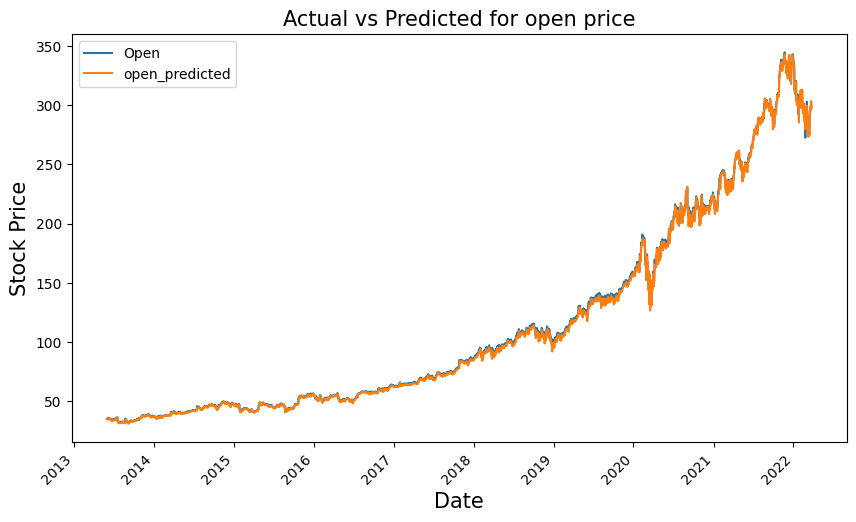

In [24]:
# plotting the actual open and predicted open prices on date index
df_merge[['Open','open_predicted']].plot(figsize=(10,6))
plt.xticks(rotation=45)
plt.xlabel('Date',size=15)
plt.ylabel('Stock Price',size=15)
plt.title('Actual vs Predicted for open price',size=15)
plt.show()

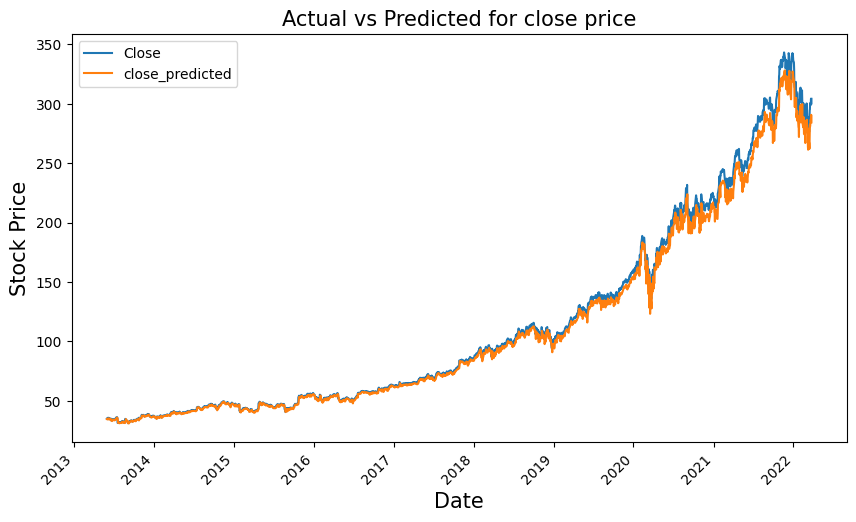

In [25]:
# plotting the actual close and predicted close prices on date index 
df_merge[['Close','close_predicted']].plot(figsize=(10,6))
plt.xticks(rotation=45)
plt.xlabel('Date',size=15)
plt.ylabel('Stock Price',size=15)
plt.title('Actual vs Predicted for close price',size=15)
plt.show()

STEP 6. PREDICTING UPCOMING 10 DAYS

In [29]:
# Creating a dataframe and adding 10 days to existing index 

df_merge = df_merge.append(pd.DataFrame(columns=df_merge.columns,
                                        index=pd.date_range(start=df_merge.index[-1], periods=11, freq='D', closed='right')))
df_merge['2022-03-18':'2022-03-28']

,Open,Close,open_predicted,close_predicted
2022-03-18,295.369995,300.429993,293.956360,280.860748
2022-03-21,298.890015,299.160004,299.901367,286.912384
2022-03-22,299.799988,304.059998,297.861084,284.814972
2022-03-23,300.510010,299.489990,303.508636,290.598694
2022-03-24,299.140015,304.100006,297.227020,284.249451
2022-03-25,NaN,NaN,NaN,NaN
2022-03-26,NaN,NaN,NaN,NaN
2022-03-27,NaN,NaN,NaN,NaN
2022-03-28,NaN,NaN,NaN,NaN


In [27]:
# creating a DataFrame and filling values of open and close column
upcoming_prediction = pd.DataFrame(columns=['Open','Close'],index=df_merge.index)
upcoming_prediction.index=pd.to_datetime(upcoming_prediction.index)

In [28]:
curr_seq = test_seq[-1:]

for i in range(-10,0):
  up_pred = model.predict(curr_seq)
  upcoming_prediction.iloc[i] = up_pred
  curr_seq = np.append(curr_seq[0][1:],up_pred,axis=0)
  curr_seq = curr_seq.reshape(test_seq[-1:].shape)

1/1 [==============================] - 0s 46ms/step


In [30]:
# inversing Normalization/scaling
upcoming_prediction[['Open','Close']] = MMS.inverse_transform(upcoming_prediction[['Open','Close']])

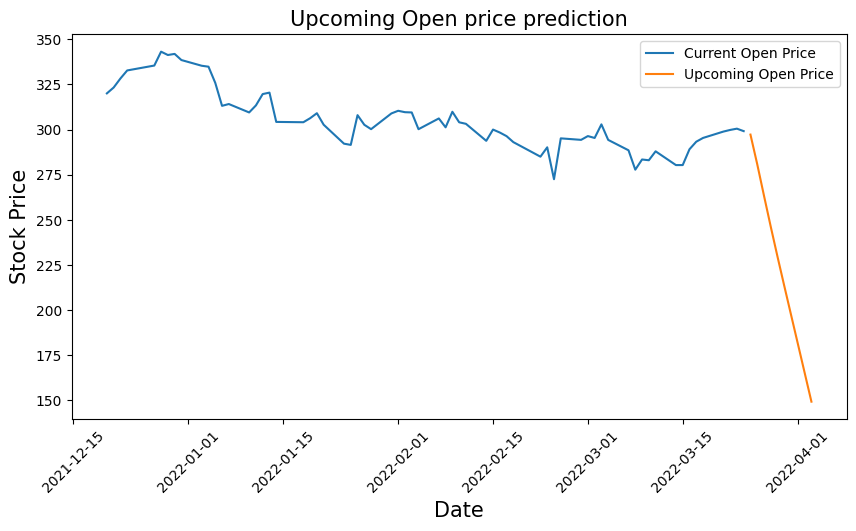

In [34]:
# plotting Upcoming Open price on date index
fig,ax=plt.subplots(figsize=(10,5))
ax.plot(df_merge.loc['2021-12-18':,'Open'],label='Current Open Price')
ax.plot(upcoming_prediction.loc['2021-12-18':,'Open'],label='Upcoming Open Price')
plt.setp(ax.xaxis.get_majorticklabels(), rotation=45)
ax.set_xlabel('Date',size=15)
ax.set_ylabel('Stock Price',size=15)
ax.set_title('Upcoming Open price prediction',size=15)
ax.legend()
fig.show()

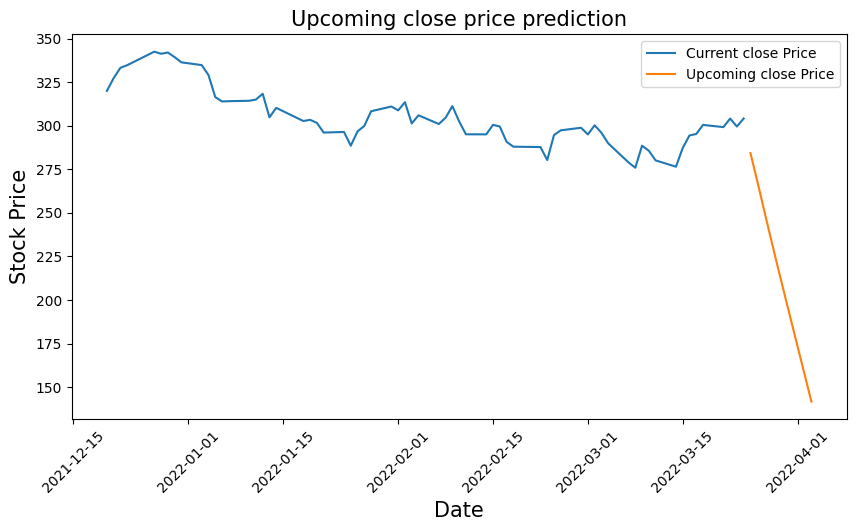

In [33]:
# plotting Upcoming Close price on date index
fig,ax=plt.subplots(figsize=(10,5))
ax.plot(df_merge.loc['2021-12-18':,'Close'],label='Current close Price')
ax.plot(upcoming_prediction.loc['2021-12-18':,'Close'],label='Upcoming close Price')
plt.setp(ax.xaxis.get_majorticklabels(), rotation=45)
ax.set_xlabel('Date',size=15)
ax.set_ylabel('Stock Price',size=15)
ax.set_title('Upcoming close price prediction',size=15)
ax.legend()
fig.show()